# Time Series 

##  Stock Market Clustering with Unsupervised Learning

### Overview  
This notebook demonstrates how to use **unsupervised learning** to analyze stock market data.  
We apply **four clustering algorithms** to stock price movements and visualize their results.  

**Algorithms Used:**  
 K-Means Clustering  
 Hierarchical Clustering  
 DBSCAN (Density-Based Clustering)  
 Gaussian Mixture Model (GMM)  

---

###  Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as requests
import joblib 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

###  Step 2: Fetch Stock Market Data from SPY500MW

In [3]:
df = pd.read_csv('SPY500MW.csv')

# Display the first few rows
print(df.head())

        Date     Open     High      Low    Close
0  8/11/2023  4450.69  4476.23  4443.98  4464.05
1  8/10/2023  4487.16  4527.37  4457.92  4468.83
2   8/9/2023  4501.57  4502.44  4461.33  4467.71
3   8/8/2023  4498.03  4503.31  4464.39  4499.38
4   8/7/2023  4491.58  4519.84  4491.15  4518.44


###  Step 3: Calculate Daily Returns

In [4]:
df.info()  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.0+ KB


In [5]:
df.describe()  # Get statistical summary

Open         High          Low        Close
count   252.000000   252.000000   252.000000   252.000000
mean   4068.113056  4095.039484  4041.684683  4069.356349
std     235.454093   229.601106   242.756045   236.959761
min    3520.370000  3608.340000  3491.580000  3577.030000
25%    3912.537500  3957.332500  3887.897500  3919.017500
50%    4047.500000  4070.330000  4018.930000  4049.625000
75%    4178.357500  4200.955000  4154.165000  4182.867500
max    4598.260000  4607.070000  4573.140000  4588.960000

In [6]:
df.columns  # List column names

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [7]:
missing_values = df.isnull().sum() 
print(missing_values)  # Check for missing

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [11]:
# Ensure 'Date' column is in datetime format and set as index if not already
if df.index.name != 'Date':
	df['Date'] = pd.to_datetime(df['Date'])
	df.set_index('Date', inplace=True)  # Set 'Date' as the index

In [13]:
# Select features for unsupervised learning
features = ['Open', 'High', 'Low', 'Close']
df_selected = df[features]

###  Step 4: Standardize Data for Clustering

In [14]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

###  Step 5: Apply PCA for 2D Visualization

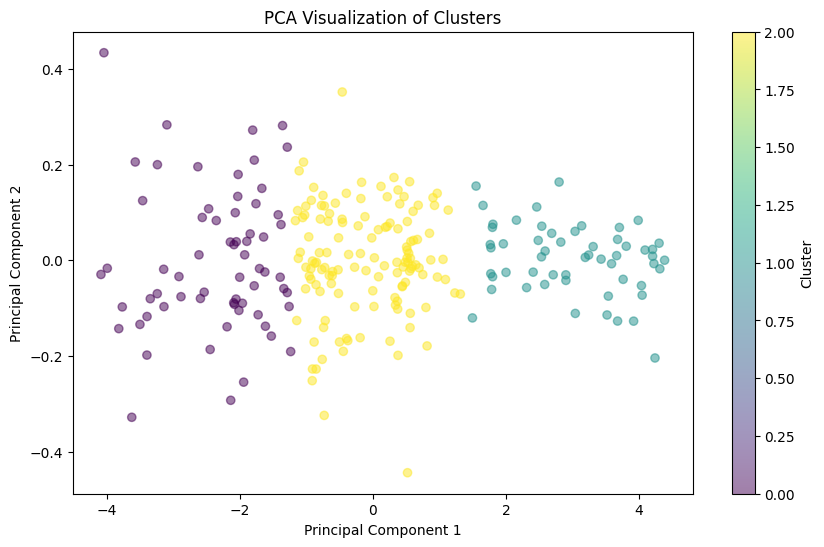

In [16]:
# Reduce to 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.colorbar(label="Cluster")
plt.show()

###  Step 6: Define Clustering Models

###  K-Means Clustering Visualization

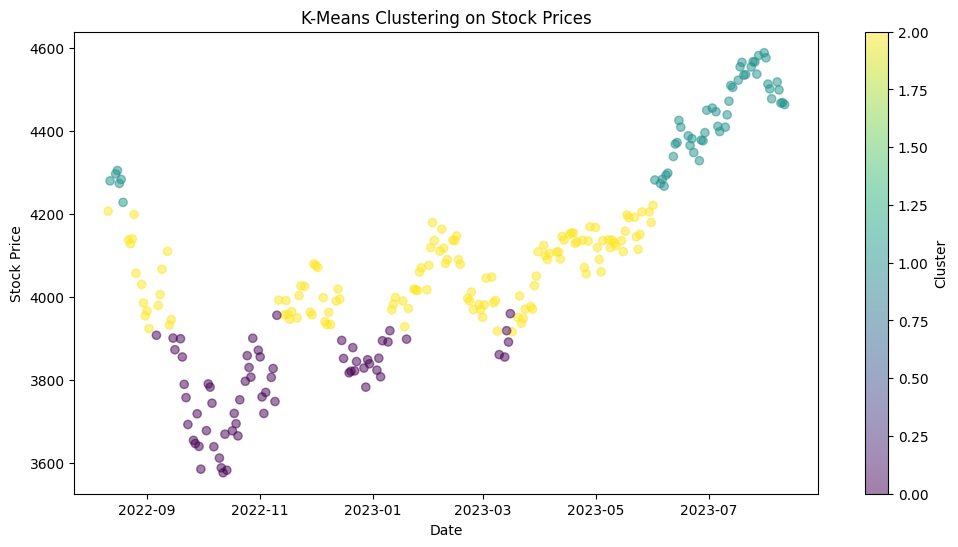

In [15]:
# Choose number of clusters (elbow method recommended for tuning)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize Clusters using Closing Price
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Close'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('K-Means Clustering on Stock Prices')
plt.colorbar(label="Cluster")
plt.show()


###  Hierarchical Clustering Visualization

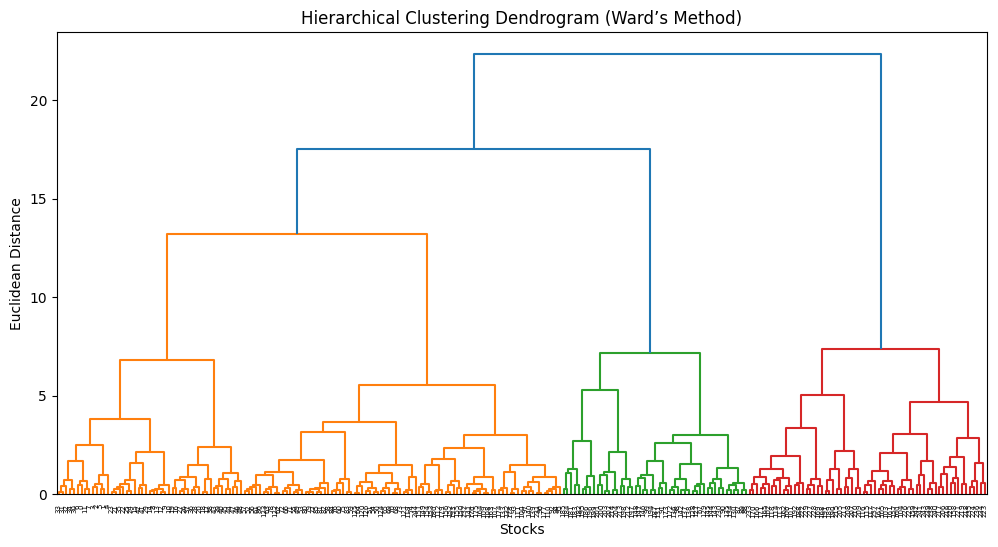

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Ward’s Method)")
plt.xlabel("Stocks")
plt.ylabel("Euclidean Distance")
plt.show()

In [30]:
from scipy.cluster.hierarchy import fcluster
# Define the number of clusters (adjust threshold as needed)
num_clusters = 3
df['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Check cluster counts
print(df['Cluster'].value_counts())

Cluster
3    133
1     63
2     49
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df['Close'], hue=df['Cluster'], palette="viridis")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Hierarchical Clustering on Stock Prices')
plt.legend(title="Cluster")
plt.show()

###  DBSCAN Clustering Visualization

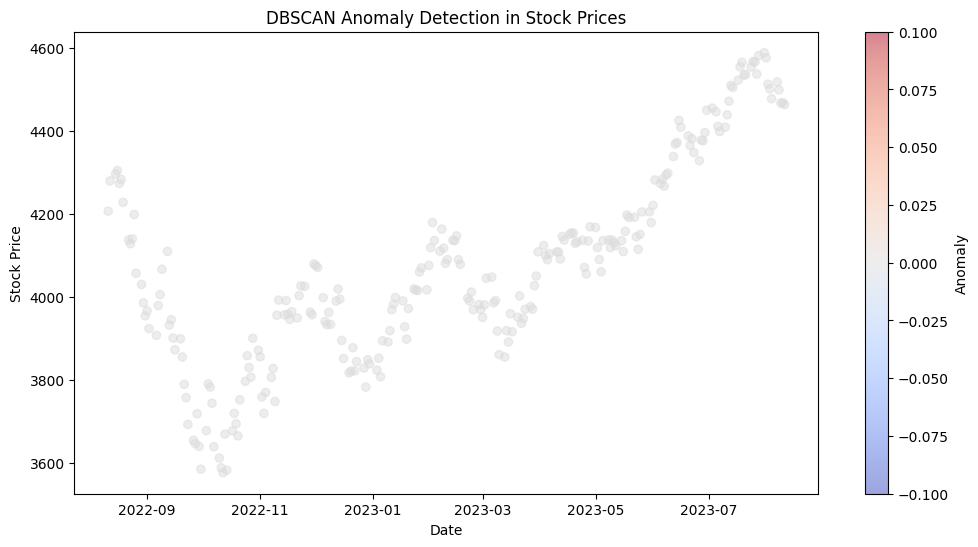

In [21]:
# Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=2, min_samples=5)
df['Anomaly'] = dbscan.fit_predict(df_scaled)

# Visualize anomalies in closing prices
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Close'], c=df['Anomaly'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('DBSCAN Anomaly Detection in Stock Prices')
plt.colorbar(label="Anomaly")
plt.show()


###  Gaussian Mixture Model (GMM) Clustering Visualization

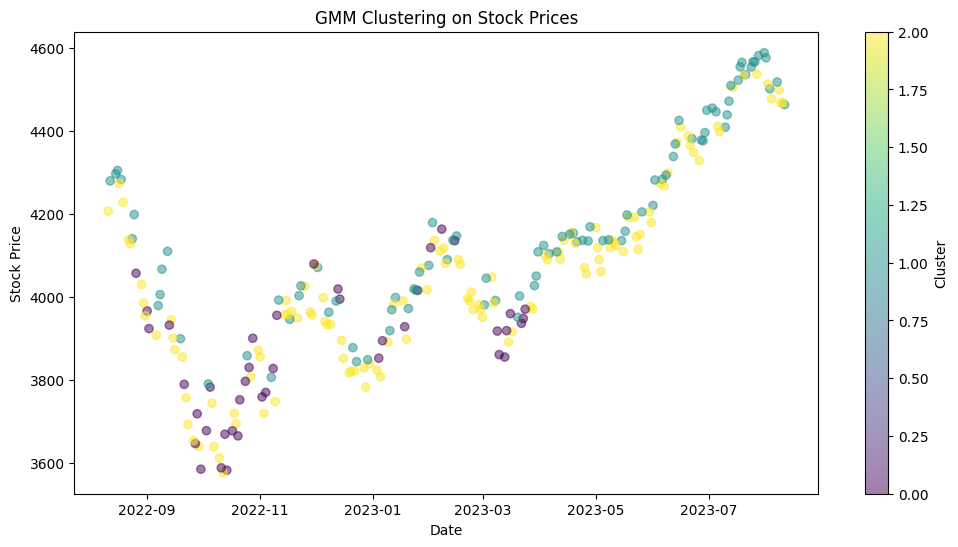

In [22]:
# Choose number of clusters (GMM works best with an optimal K)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
df['Cluster'] = gmm.fit_predict(df_scaled)

# Check cluster probabilities
df['Cluster_Probabilities'] = gmm.predict_proba(df_scaled).max(axis=1)

# Plot cluster distribution
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Close'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('GMM Clustering on Stock Prices')
plt.colorbar(label="Cluster")
plt.show()

### Optimize GMM with Bayesian Information Criterion (BIC)

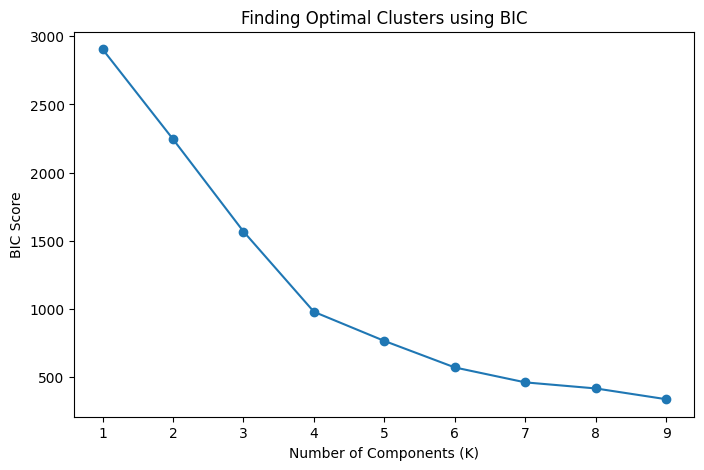

In [ ]:
bic_scores = []
n_components = range(1, 10)

for k in n_components:
    gmm = GaussianMixture(n_components=k, covariance_type='', random_state=42)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))

# Plot BIC scores
plt.figure(figsize=(8, 5))
plt.plot(n_components, bic_scores, marker='o', linestyle='-')
plt.xlabel('Number of Components (K)')
plt.ylabel('BIC Score')
plt.title('Finding Optimal Clusters using BIC')
plt.show()


In [33]:
# Save K-Means model
joblib.dump(kmeans, "kmeans_stock_model.pkl")

# Save Hierarchical clustering model (storing the linkage matrix)
joblib.dump(linked, "hierarchical_stock_model.pkl")

# Save DBSCAN model
joblib.dump(dbscan, "dbscan_stock_model.pkl")

# Save GMM model
joblib.dump(gmm, "gmm_stock_model.pkl")

# Save the scaler (for normalizing new data)
joblib.dump(scaler, "scaler.pkl")

print("All models and scaler saved successfully!")

All models and scaler saved successfully!
